In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from math import pi
from utils.sim_functions import optimize_measurement
from utils.sim_functions import complete_measurement

# <span style="color:orange"> *Complete signal equation - T1 // T2* // PD & calculation of Flip Angle* </span> 

Completeing signal equation with T1 and TR block + the effect of the flip angle. <br>
Flip angle should be the ernst angle which by definition is the *arc cos* of exp(-TR/T1). Fixing TR leads to the FA needed to maximize signal from either GM or WM from the spinal cord. <br>
Signal equation for spoiled gradient-recalled echo: </br>
a
</br>
Don't forget to create your header in matlab!

### <span style="color:#BC8EC4"> *Piecewise complete simulation* </span> 

In [2]:
path_to_segmentations = ""
path_to_pd = ""
path_to_t1 = ""
path_to_t2s = ""
path_to_fm = ""
######### ####### # # ####### # # # # # # # # #### # # ### #
segmentations_img = nib.load(path_to_segmentations)
segmentations_data = segmentations_img.get_fdata()      
dimensions = np.array(segmentations_data.shape)
dimensions

array([512, 512, 828])

In [3]:
# Load nifti volumes
pd_pw_img = nib.load(path_to_pd)
pd_pw_data = pd_pw_img.get_fdata()

t2s_pw_img = nib.load(path_to_t2s)
t2s_pw_data = t2s_pw_img.get_fdata()

t1_pw_img = nib.load(path_to_t1)
t1_pw_data = t1_pw_img.get_fdata()

# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
deltaB0_pw_img = nib.load(path_to_fm)
dB0_pw_ppm_data = deltaB0_pw_img.get_fdata()

In [4]:
# Acquisition parameters:
t1_gm = 984
t1_wm = 857
tr = 16 
fieldStrength = 3 # Tesla
fa_gm = np.rad2deg(np.arccos(np.exp(-tr/t1_gm))) # Degrees
print("FA for gm: ", fa_gm)
# Echo times
complete_TEs = [0.004, 0.008, 0.012, 0.016, 0.020, 0.024]
swiss_TE_list = [6.86*1e-3, 13.14*1e-3, 19.42*1e-3, 25.7*1e-3, 31.98*1e-3]

FA for gm:  10.304394802819381


In [5]:
complete_pw_mag, complete_pw_phase = complete_measurement(t1_pw_data, pd_pw_data, t2s_pw_data, dimensions, dB0_pw_ppm_data , fa_gm, swiss_TE_list, tr, fieldStrength, handedness='right') # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.006860000000000001  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=right
Coefficient of phase factor:  5.5056066175152j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[1] = 0.01314  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=right
Coefficient of phase factor:  10.545724628884798j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[2] = 0.019420000000000003  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=right
Coefficient of phase factor:  15.5858426402544j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[3] = 0.0257  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=right
Coefficient of phase factor:  20.625960651624j
Finished opt

In [6]:
temp_pw_mag = nib.Nifti1Image(complete_pw_mag, affine = segmentations_img.affine)
temp_pw_ph = nib.Nifti1Image(complete_pw_phase, affine = segmentations_img.affine)


pw_magnitude_outpath = r""
pw_phase_outpath = r""

nib.save(temp_pw_mag, pw_magnitude_outpath)
nib.save(temp_pw_ph, pw_phase_outpath)

### <span style="color:#BC8EC4"> *Gaussian complete simulation* </span> </br>
*Soon!* Still waiting on consensus for gaussian distribution of values

In [2]:
path_to_segmentations = "E:/msc_data/sc_qsm/data/wb/data/ratatouille_corrected_pixels.nii.gz"
path_to_gauss_t1 = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_t1.nii.gz"
path_to_gauss_pd = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_pd.nii.gz"
path_to_gauss_t2s = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_t2s.nii.gz"
path_to_gauss_fm = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_gauss_tsting_fm_ppm.nii.gz"
fieldStrength = 3 # In Tesla

In [3]:
segmentations_img = nib.load(path_to_segmentations)
segmentations_data = segmentations_img.get_fdata()      
dimensions = np.array(segmentations_data.shape)

pd_gauss_img = nib.load(path_to_gauss_pd)
pd_gauss_data = pd_gauss_img.get_fdata()
t2s_gauss_img = nib.load(path_to_gauss_t2s)
t2s_gauss_data = t2s_gauss_img.get_fdata()
t1_gauss_img = nib.load(path_to_gauss_t1)
t1_gauss_data = t1_gauss_img.get_fdata()

# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
deltaB0_gauss_img = nib.load(path_to_gauss_fm)
dB0_gauss_ppm_data = deltaB0_gauss_img.get_fdata()

In [5]:
# We want to maximize contrast between SC wm and SC gm
t1_gm = 984
t1_wm = 857
tr = 16 

fa_gm = np.rad2deg(np.arccos(np.exp(-tr/t1_gm)))
fa_wm = np.rad2deg(np.arccos(np.exp(-tr/t1_wm)))

print("FA for gm: ", fa_gm)
print("FA for wm: ", fa_wm)

FA for gm:  10.304394802819381
FA for wm:  11.0371009293002


In [6]:
np.sin(np.deg2rad(fa_gm))

0.1788776822909693

In [7]:
np.deg2rad(fa_gm)

0.17984561673459007

### Plotting Intensity for FA selection

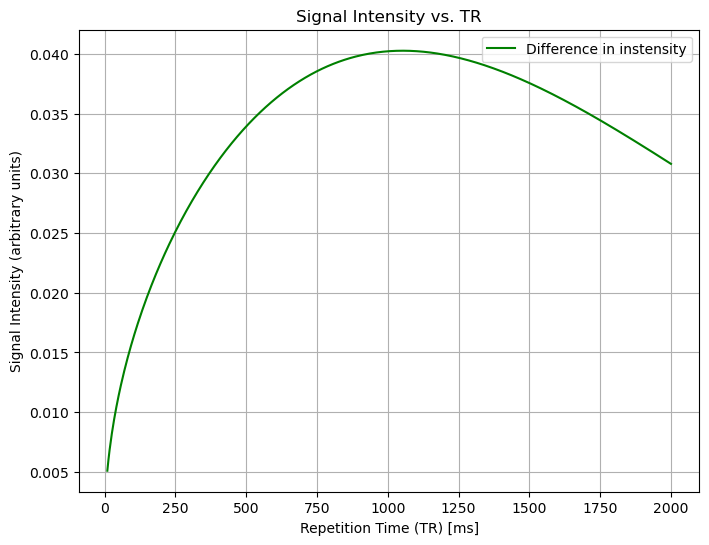

In [5]:
# What if we don't fix TR?
import numpy as np
import matplotlib.pyplot as plt

TRs = np.linspace(10, 2000, 500)
theta_1 = np.arccos(np.exp(-TRs / t1_gm))
theta_2 = np.arccos(np.exp(-TRs / t1_wm))

E1_gm = np.exp(-TRs / t1_gm)
E1_wm = np.exp(-TRs / t1_wm)
S1 = np.sin(theta_1) * (1 - E1_gm) / (1 - E1_gm * np.cos(theta_1))
S2 = np.sin(theta_2) * (1 - E1_wm) / (1 - E1_wm * np.cos(theta_2))

# Plot
plt.figure(figsize=(8, 6))
#plt.plot(TRs, S1, label=f'T1 = {t1_gm} ms', color='blue')
#plt.plot(TRs, S2, label=f'T1 = {t1_wm} ms', color='red')
plt.plot(TRs, np.abs(S2-S1), label=f'Difference in instensity', color='green')
plt.xlabel('Repetition Time (TR) [ms]')
plt.ylabel('Signal Intensity (arbitrary units)')
plt.title('Signal Intensity vs. TR')
plt.legend()
plt.grid(True)
plt.show()

### Acquistion parameters and measurement

In [8]:
# Following the QSM recommendations for initial testing, echospacing of 8ms and we should include the T2s of tissue of interest
# In this case our last echo would be T2* of sc_gm around 40ms
complete_TEs = [0.008, 0.016, 0.024, 0.032, 0.040]

In [9]:
complete_gauss_mag, complete_gauss_phase = complete_measurement(t1_gauss_data, pd_gauss_data, t2s_gauss_data, dimensions, dB0_gauss_ppm_data , fa_gm, complete_TEs, tr, fieldStrength) # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.008  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -6.420532498559999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[1] = 0.016  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -12.841064997119998j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[2] = 0.024  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -19.261597495679997j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[3] = 0.032  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -25.682129994239997j
Finished optimized_signal
mag shape: (

In [10]:
temp_gauss_mag = nib.Nifti1Image(complete_gauss_mag, affine = segmentations_img.affine)
temp_gauss_ph = nib.Nifti1Image(complete_gauss_phase, affine = segmentations_img.affine)

gauss_magnitude_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/gauss_full_sim_mag_pro.nii.gz"
gauss_phase_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/gauss_full_sim_phase_pro.nii.gz"

nib.save(temp_gauss_mag, gauss_magnitude_outpath)
nib.save(temp_gauss_ph, gauss_phase_outpath)

### Loading Mag & Phase for Echo extraction

In [ ]:
# After cropping, we can load and extract just 1 echo or all
path_to_cropped_pw_mag = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_mag_pro_cropped.nii.gz"
cropped_pw_mag_img = nib.load(path_to_cropped_pw_mag)
cropped_pw_mag_data = cropped_pw_mag_img.get_fdata()

In [ ]:
path_to_cropped_pw_ph = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_mag_pro_cropped.nii.gz"
cropped_pw_ph_img = nib.load(path_to_cropped_pw_ph)
cropped_pw_ph_data = cropped_pw_mag_img.get_fdata()

# <span style="color:#EE6594"> *Complete Cropped signal equation - T1 // T2* // PD & calculation of Flip Angle* </span> </br>
We can compute the fieldmap with all the field of view and then cropped to any size, the simulation will be realistic because the frequency offset effect is already portrayed from the whole body fieldmap calculated. </br>
For this, we are using a bounding box </br>
x: [100, 400] </br>
y: [50, 400] </br>
z: [673, 800] </br>

This is good enough coverage of the cervical spine from brain to C5

### <span style="color:#BC8EC4"> *Piecewise complete simulation* </span> 

In [10]:
path_to_cropped_segmentations = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data/ratatouille_swisss_crop.nii.gz"
path_to_cropped_pd = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data\output/qsm_pd_swiss_testing.nii.gz"
path_to_cropped_t1 = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data\output/qsm_t1_swiss_testing.nii.gz"
path_to_cropped_t2s = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data\output/qsm_t2s_swiss_testing.nii.gz"
path_to_cropped_fm_ppm = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data\output/qsm_crop_fm_ppm_swiss_testing.nii.gz"
######### ####### # # ####### # # # # # # # # #### # # ### #
cropped_segmentations_img = nib.load(path_to_cropped_segmentations)
cropped_segmentations_data = cropped_segmentations_img.get_fdata()      
cropped_dimensions = np.array(cropped_segmentations_data.shape)
cropped_dimensions

array([301, 351, 128])

In [11]:
# Load nifti volumes
crop_pd_pw_img = nib.load(path_to_cropped_pd)
crop_pd_pw_data = crop_pd_pw_img.get_fdata()

crop_t2s_pw_img = nib.load(path_to_cropped_t2s)
crop_t2s_pw_data = crop_t2s_pw_img.get_fdata()

crop_t1_pw_img = nib.load(path_to_cropped_t1)
crop_t1_pw_data = crop_t1_pw_img.get_fdata()

# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
crop_deltaB0_pw_img = nib.load(path_to_cropped_fm_ppm)
crop_dB0_pw_ppm_data = crop_deltaB0_pw_img.get_fdata()

In [12]:
# Acquisition parameters:
t1_gm = 984
t1_wm = 857
tr = 16 
fieldStrength = 3 # Tesla
fa_gm = np.rad2deg(np.arccos(np.exp(-tr/t1_gm))) # Degrees
fa_swiss_acq = 44
print("FA for gm: ", fa_gm)
# Echo times
swiss_TE_list = [6.86*1e-3, 13.14*1e-3, 19.42*1e-3, 25.7*1e-3, 31.98*1e-3]
weird_TEs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.010, 0.015, 0.020, 0.030, 0.040] # This provides better T2* fit but is unrealistic.

FA for gm:  10.304394802819381


In [13]:
cropped_pw_mag, cropped_pw_phase = complete_measurement(crop_t1_pw_data, crop_pd_pw_data, crop_t2s_pw_data, cropped_dimensions, crop_dB0_pw_ppm_data , fa_swiss_acq, swiss_TE_list, tr, fieldStrength, handedness= 'right') # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.006860000000000001  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.6946583704589973
handedness=right
Coefficient of phase factor:  5.5056066175152j
Finished optimized_signal
mag shape: (301, 351, 128), phase_arr shape: (301, 351, 128)
Processing TE[1] = 0.01314  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.6946583704589973
handedness=right
Coefficient of phase factor:  10.545724628884798j
Finished optimized_signal
mag shape: (301, 351, 128), phase_arr shape: (301, 351, 128)
Processing TE[2] = 0.019420000000000003  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.6946583704589973
handedness=right
Coefficient of phase factor:  15.5858426402544j
Finished optimized_signal
mag shape: (301, 351, 128), phase_arr shape: (301, 351, 128)
Processing TE[3] = 0.0257  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.6946583704589973
handedness=right
Coefficient of phase factor:  20.625960651624j
Finished opt

In [14]:
temp_crop_pw_mag = nib.Nifti1Image(cropped_pw_mag, affine = cropped_segmentations_img.affine)
temp_crop_pw_ph = nib.Nifti1Image(cropped_pw_phase, affine = cropped_segmentations_img.affine)

cropped_pw_magnitude_outpath = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data\simulation/pw_full_sim_mag_pro.nii.gz"
cropped_pw_phase_outpath = r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\simulations\sim_data\simulation/pw_full_sim_ph_pro.nii.gz"

nib.save(temp_crop_pw_mag, cropped_pw_magnitude_outpath)
nib.save(temp_crop_pw_ph, cropped_pw_phase_outpath)

# Testing python stuff that makes things wrong

In [15]:
gamma_rd_sT = 267.52218744 * 10e5 # In rad/(sec * T)
gamma_rd_sT

267522187.43999997

In [16]:
a = 0.008
c= a*1e3
print(c)
b = a*10e3
b

8.0


80.0

In [17]:
t2s_vol[80,80,80]
h = t2s_vol[80,80,80]*1e-3
print(h)

NameError: name 't2s_vol' is not defined

In [25]:
267.52218744 * 1e6 * 3 * 1e-6 /(2*pi*3)

42.57747851783255

In [12]:
for te in range(len(TE_list)):
    mag_name = "sim_mag_pro"+ "_echo_" + str(te) +".nii.gz"
    phs_name = "sim_phase_pro"+ "_echo_" + str(te) +".nii.gz"
    print(mag_name)
    print(phs_name)

sim_mag_pro_echo_0.nii.gz
sim_phase_pro_echo_0.nii.gz
sim_mag_pro_echo_1.nii.gz
sim_phase_pro_echo_1.nii.gz


## Example of pixel correction

In [2]:
import numpy as np
import nibabel as nib
%cd tissue-to-MRproperty
%cd functions
from volume import volume
%cd ../..

c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty
c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty\functions
c:\Users\User\msc_project\Image-processing-strategies\MRsim


c:\Users\User\miniconda3\envs\mrsim\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
c:\Users\User\miniconda3\envs\mrsim\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Lets create a volume object with the labeled nifti file
labeled_img = nib.load("data/ratatouille_crop.nii.gz")
rata_class = volume(labeled_img)
rata_class.group_seg_labels("TotalSeg_CT", "mod2")

In [6]:
rata_class.check_pixels()

Pixel with wrong value: 809.0 located at (47, 29, 77)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  196
Pixel with wrong value: 809.0 located at (47, 30, 74)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  196
Pixel with wrong value: 809.0 located at (48, 28, 81)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  196
Pixel with wrong value: 749.0 located at (60, 100, 178)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  289
Pixel with wrong value: 749.0 located at (61, 100, 178)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  289
Saving corrected volume for later usage!


0

# Adding Gaussian Noise to magnitude

## Testing 

### Grouping them up based on their susceptibility to create a label_gaussians 

In [14]:
std_dev = {

            "air": 2.78,  # air is backgrund
            # To all labels we have substracted air std_dev
            "bone": 10.87,
            "lung": 8.01,
            # Water is a value similar to CSF
            "water": 27.79,
            "CSF": 26.5,

            "spinal_cord": 7.64,

            "sc_csf": 26.5,
            # This values are not taken from Whole spine data
            # But taken from Brain image.
            # EAO Flash 2.5mm
            "sc_wm": 9.82,
            "sc_gm": 12.76,
            "brain": 27.91,
            ### Back to Whole Spine data values
            "fat": 33.78,
            "liver": 14.82,
            "spleen": 16.17,

            # "white_matter": ,  # This is the brain WM
            # "gray_matter": ,  # This is the brain GM

            "heart": 15.49,
            "kidney": 14.35,
            "pancreas": 16.94,
            "cartilage": 10.21,
            "bone_marrow": 12.2,
            "SpinalCanal": 18.895,  # sc_csf + (sc_wm + sc_gm / 2 )
            "esophagus": 17.33,
            "trachea": 10.21,  # Trachea should have similar to lung
            "organ": 14.66,
            "gland": 15.82,

            "extra": 14.91,

            "sinus": 9.53}

std_dev['air']

2.78